In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install wordcloud
from wordcloud import WordCloud

In [19]:
#loading case data
case_data = pd.read_csv('time_series_covid19_confirmed_US.csv')
#loading death data
death_data = pd.read_csv('time_series_covid19_deaths_US.csv')
#loading county data
data = pd.read_csv('abridged_counties.csv')
#finding that some numbers and variables are by state vs others vary by county
april_data = pd.read_csv('4.18states.csv')


In [20]:
#all columns within counties dataframe
print(data.shape)
data.columns

(3244, 87)


Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [21]:
#find counties per state 
by_state = data.groupby('StateName').count()
by_state

,countyFIPS,STATEFP,COUNTYFP,CountyName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
StateName,,,,,,,,,,,,,,,,,,,,,
AK,32,29,29,32,0,0,0,29,29,32,...,29,29,29,29,29,29,29,16,16,16
AL,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,55,55,55
AR,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,46,46,46
AS,5,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,5,5
AZ,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,0,0,0
CA,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,3,3,3
CO,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,40,40,40
CT,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,0,0,0
DC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [22]:
# show number of counties per state
state_county_count= data.groupby('StateName').count()[['CountyName']]
state_county_count

,CountyName
StateName,
AK,32
AL,67
AR,75
AS,5
AZ,15
CA,58
CO,64
CT,8
DC,1


In [23]:
#join death and counties data
death_joined = data.join(death_data, lsuffix='StateName', rsuffix='Province_State')
death_joined

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,0,0,0,0,0,0,0,0,0,0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,4,4,5,5,5,5,5,5,5,5
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2,2,2,2,2,2,2,2,2,2
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,33,39,42,44,45,45,51,56,58,60
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,1,1,1,1,1,1,1,1,2,3
5,01011,1.0,11.0,Bullock,AL,Alabama,32.106336,-85.716804,32.116327,-85.701192,...,1,1,1,1,1,1,1,1,2,2
6,01013,1.0,13.0,Butler,AL,Alabama,31.757139,-86.684347,31.773539,-86.653550,...,1,1,1,1,1,2,2,2,2,2
7,01015,1.0,15.0,Calhoun,AL,Alabama,33.776245,-85.829561,33.725460,-85.819442,...,0,0,0,0,0,0,0,0,0,0
8,01017,1.0,17.0,Chambers,AL,Alabama,32.916331,-85.394853,32.860439,-85.266474,...,0,0,0,0,0,0,0,0,0,0
9,01019,1.0,19.0,Cherokee,AL,Alabama,34.191471,-85.604220,34.179333,-85.629194,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#create table that just contains State Names and their deaths per county per date 

death_plot = death_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_',
 'Population'], axis = 1)
death_plot = death_plot.T
#list(death_plot.columns)
death_plot = death_plot.iloc[50:]
death_plot = death_plot.set_index(pd.to_datetime(death_plot.index))
death_plot

StateName,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
2020-03-12,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,31,0,0,0
2020-03-13,0,0,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,37,0,0,0
2020-03-14,0,0,0,0,0,3,0,0,0,0,...,0,0,0,1,0,0,39,0,0,0
2020-03-15,0,0,0,0,0,5,1,0,0,0,...,0,0,0,1,0,0,40,0,0,0
2020-03-16,0,0,0,0,0,7,1,0,0,0,...,0,0,0,2,0,0,48,0,0,0
2020-03-17,0,0,0,0,0,12,1,1,0,0,...,0,1,0,2,0,0,55,0,0,0
2020-03-18,0,0,0,0,0,16,1,1,0,1,...,0,3,0,2,0,0,67,0,0,0
2020-03-19,0,0,0,0,0,18,3,1,0,3,...,0,5,0,3,4,0,73,4,0,0
2020-03-20,0,0,0,0,0,24,3,1,0,4,...,1,4,0,3,6,1,82,3,1,0
2020-03-21,0,1,0,0,1,25,5,1,0,4,...,1,5,0,4,0,1,92,4,2,0


In [45]:
#gives states with most deaths per date 
list(death_plot.idxmax(axis=1))
#over time leaders: AK, WA, NY overall for deaths 

['WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

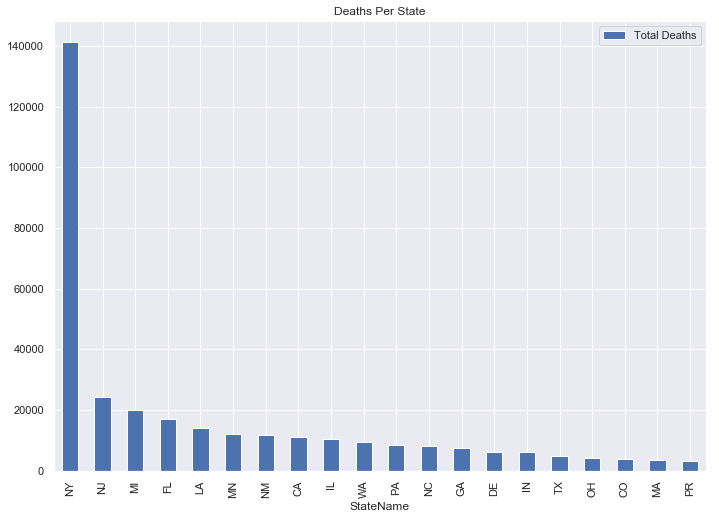

In [63]:
#creating data frame to show count of deaths per state
count_death_per_state = pd.DataFrame(death_plot.sum())
count_death_per_state = count_death_per_state.rename(columns = {0: 'Total Deaths'})

count_death_per_state = count_death_per_state.sort_values(by = 'Total Deaths', ascending = False)

count_dps = count_death_per_state.reset_index()
count_dps.plot(x='StateName', y=['Total Deaths'], kind="bar", title = "Deaths Per State")



Text(0, 0.5, 'Death Count')

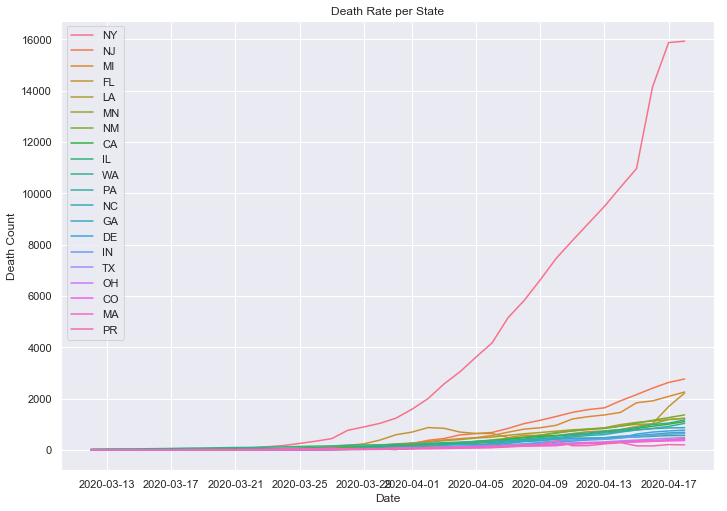

In [64]:
#line plot showing top 20 leading states in death count and the death rate over time 
top_20_states = count_death_per_state[:20]
column_names_top_20 = top_20_states.index.tolist()
death_plot = death_plot[column_names_top_20]
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plot1 = sns.lineplot(data = death_plot, dashes = False)
plot1.set_title('Death Rate per State')
plot1.set_xlabel('Date')
plot1.set_ylabel('Death Count')

In [154]:
case_joined = data.join(case_data, lsuffix='StateName', rsuffix='Province_State')
#case_joined
#list(case_joined.columns)


#create table that just contains State Names and their confirmed cases per county per date 

case_plot = case_joined.set_index('StateName').groupby('StateName').sum()
#list(case_plot)

case_plot = case_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_'], axis = 1)
case_plot = case_plot.T

case_plot


StateName,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/27/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/28/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/29/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/30/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/31/20,0,0,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
case_plot = case_plot.iloc[40:]
case_plot
case_plot = case_plot.set_index(pd.to_datetime(case_plot.index))

In [67]:
#gives states with most cases per date 
list(case_plot.idxmax(axis=1))
#leaders: WA, IL, CA, WA, NY

['CA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

Text(0, 0.5, 'Case Count')

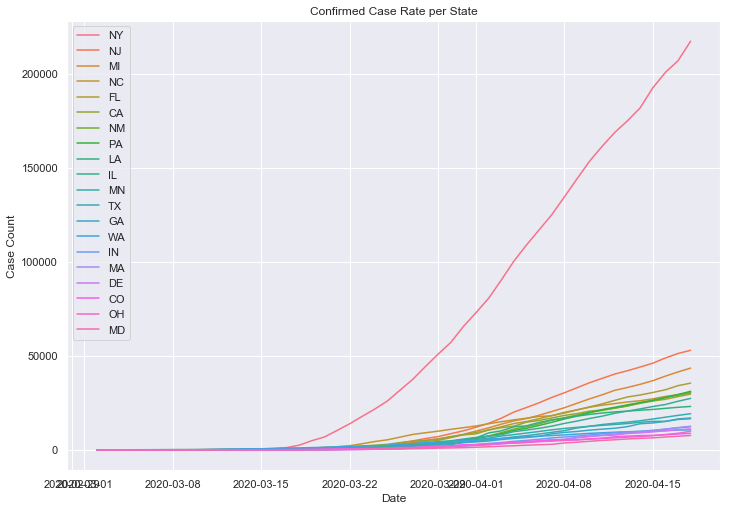

In [74]:
#line plot showing all states and they case rate over time 
count_cases_per_state = pd.DataFrame(case_plot.sum())
count_cases_per_state = count_cases_per_state.rename(columns = {0: 'Total Deaths'})

count_cases_per_state = count_cases_per_state.sort_values(by = 'Total Deaths', ascending = False)
top_20_states_cases = count_cases_per_state[:20]
column_names_top_20_cases = top_20_states_cases.index.tolist()
column_names_top_20_cases
case_plot = case_plot[column_names_top_20_cases]
#case_plot
plot2 = sns.lineplot(data = case_plot, dashes = False)
plot2.set_title('Confirmed Case Rate per State')
plot2.set_xlabel('Date')
plot2.set_ylabel('Case Count')

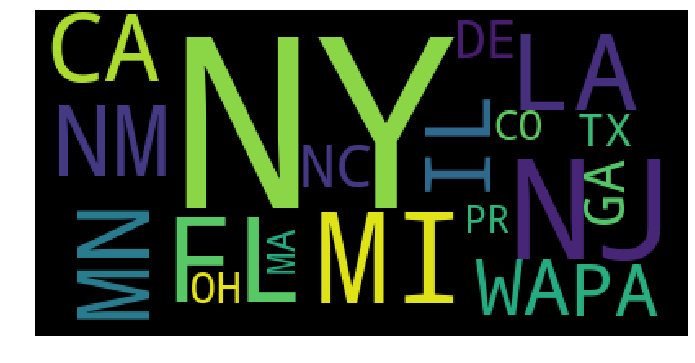

In [85]:
#Word Cloud for Death Prevalence per State

deaths_per_state = list(death_plot.sum(axis=0))
state_names_deaths  = []
death_count = 0

for i in range(len(death_plot.columns)): 
    for j in range(deaths_per_state[death_count]):
        state_names_deaths.append(death_plot.columns[i])
    death_count = death_count + 1 
state_names_deaths

words = ' '.join(list(state_names_deaths))
wordcloud = WordCloud(collocations = False).generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

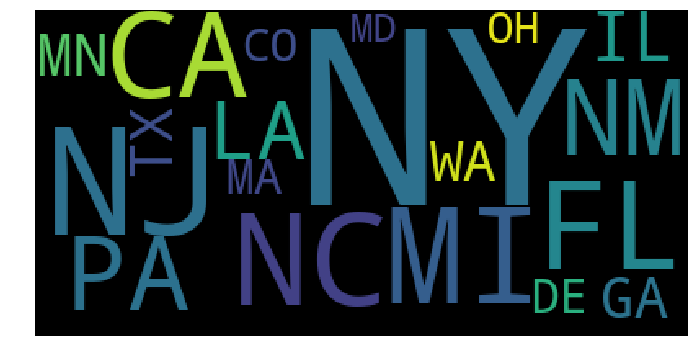

In [151]:
#Word Cloud showing prevalence of total cases 

cases_per_state = list(case_plot.sum(axis=0))
state_names_cases  = []
cases_count = 0

for i in range(len(case_plot.columns)): 
    for j in range(cases_per_state[cases_count]):
        state_names_cases.append(case_plot.columns[i])
    cases_count = cases_count + 1 
state_names_cases

words = ' '.join(list(state_names_cases))
wordcloud = WordCloud(collocations = False).generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

In [87]:
#getting population per state 
pop_state = data.groupby('StateName').sum()[['PopulationEstimate2018']]
pop_state

,PopulationEstimate2018
StateName,
AK,737438.0
AL,4887871.0
AR,3013825.0
AS,0.0
AZ,7171646.0
CA,39557045.0
CO,5695564.0
CT,3572665.0
DC,702455.0


In [89]:
death_per_state = pd.DataFrame(death_plot.sum(axis=0)).rename(columns={0:'Death_Count'})
death_per_state

,Death_Count
StateName,
NY,141141
NJ,24119
MI,19838
FL,17130
LA,14035
MN,12028
NM,11747
CA,11112
IL,10275


Text(0, 0.5, 'Death Count')

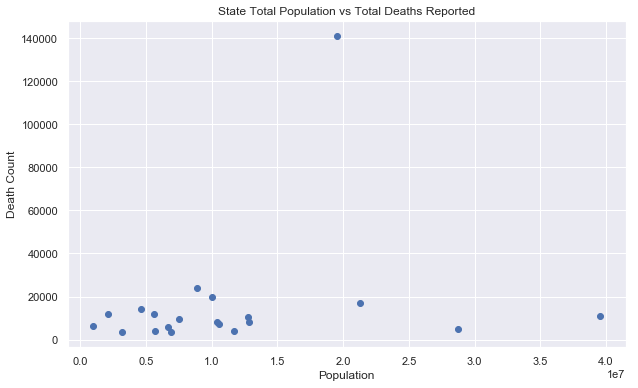

In [162]:
#population per state data scatter versus total deaths 
pop_state['Deaths']= death_per_state['Death_Count']
pop_state_vs_death = pop_state 

pop_state_vs_death

plt.figure(figsize=(10, 6))
plt.scatter(pop_state_vs_death['PopulationEstimate2018'],pop_state_vs_death['Deaths'] )

plt.title('State Total Population vs Total Deaths Reported')
plt.xlabel('Population')
plt.ylabel('Death Count')


Text(0.5, 0, '# of People Ages 60+ per County')

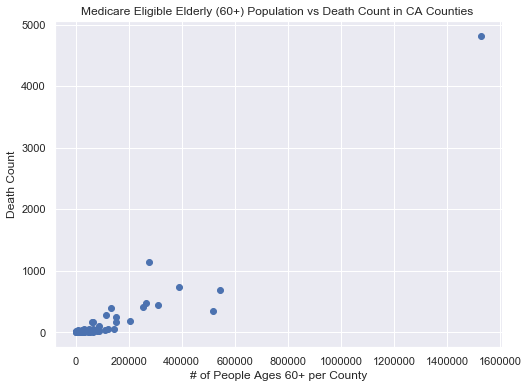

In [111]:
#within california and maybe do some other states 

#join on counties in california 

#graphing medicare eligible population to find correlation between seniors and death rates

county_old = data[data['StateName'] == 'CA'][['CountyName','#EligibleforMedicare2018']]


death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'California'][['Admin2']]
death_per_county = death_per_county.rename(columns = {0: 'Deaths'})
#death_per_county = death_per_county.iloc[:2] #2 counties misc not in other table for pop
county_old = county_old.reset_index(drop=True)
death_per_county = death_per_county.reset_index(drop = True)

death_vs_old = county_old.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
death_vs_old

plt.figure(figsize=(8, 6))
plt.scatter(death_vs_old['#EligibleforMedicare2018'], death_vs_old['Deaths'])
plt.title('Medicare Eligible Elderly (60+) Population vs Death Count in CA Counties ')
plt.ylabel('Death Count')
plt.xlabel('# of People Ages 60+ per County')



In [116]:
#choosing NC because they have almost full data in HPSA category
#finding counties and hpsa underserved pop in each

NC_county_HPSA = data[data['StateName'] == 'NC'][['CountyName','HPSAUnderservedPop']]
NC_county_HPSA = NC_county_HPSA.dropna()
NC_county_HPSA = NC_county_HPSA.reset_index(drop=True)
NC_county_HPSA

,CountyName,HPSAUnderservedPop
0,Alamance,10524.0
1,Alexander,5644.0
2,Alleghany,3873.0
3,Anson,15049.0
4,Ashe,4262.0
5,Avery,6374.0
6,Bertie,2309.0
7,Bladen,6561.0
8,Brunswick,13166.0
9,Buncombe,9328.0


In [117]:
#finding deaths per county in NC 
NC_death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'North Carolina'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
NC_death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'North Carolina'][['Admin2']]
NC_death_per_county = NC_death_per_county.rename(columns = {0: 'Deaths'})
NC_death_per_county = NC_death_per_county.reset_index(drop=True)
NC_death_per_county

,Deaths,County_Name
0,0,Alamance
1,0,Alexander
2,0,Alleghany
3,0,Anson
4,0,Ashe
5,0,Avery
6,0,Beaufort
7,17,Bertie
8,0,Bladen
9,18,Brunswick


In [118]:
#combining tables to graph hpsa vs deaths per county
NC_HPSA_death = NC_death_per_county.join(NC_county_HPSA, lsuffix='County_Name', rsuffix='CountyName').drop(['CountyName'], axis = 1).dropna()
NC_HPSA_death

,Deaths,County_Name,HPSAUnderservedPop
0,0,Alamance,10524.0
1,0,Alexander,5644.0
2,0,Alleghany,3873.0
3,0,Anson,15049.0
4,0,Ashe,4262.0
5,0,Avery,6374.0
6,0,Beaufort,2309.0
7,17,Bertie,6561.0
8,0,Bladen,13166.0
9,18,Brunswick,9328.0


Text(0.5, 0, 'Underserved Health Population')

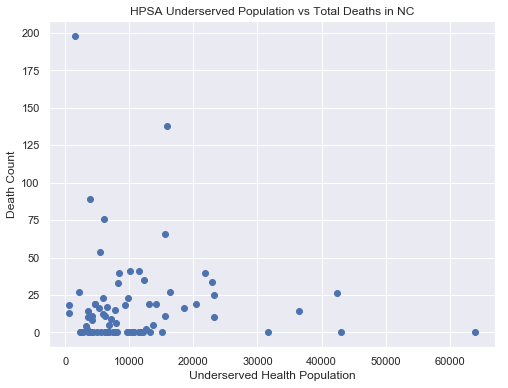

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(NC_HPSA_death['HPSAUnderservedPop'], NC_HPSA_death['Deaths'])
plt.title('HPSA Underserved Population vs Total Deaths in NC')
plt.ylabel('Death Count')
plt.xlabel('Underserved Health Population')

In [122]:
#exploring CA hospital counts versus CA death counts 
hospital_county = data[data['StateName'] == 'CA'][['CountyName','#Hospitals']]
hospital_county = hospital_county.dropna()
hospital_county = hospital_county.reset_index(drop=True)
#hospital_county
#getting hospitals per county and death count per county
hospital_death_CA = hospital_county.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
hospital_death_CA

,CountyName,#Hospitals,Deaths
0,Alameda,12.0,414
1,Alpine,0.0,0
2,Amador,1.0,0
3,Butte,4.0,0
4,Calaveras,1.0,0
5,Colusa,1.0,0
6,Contra Costa,7.0,189
7,Del Norte,1.0,0
8,El Dorado,2.0,0
9,Fresno,7.0,62


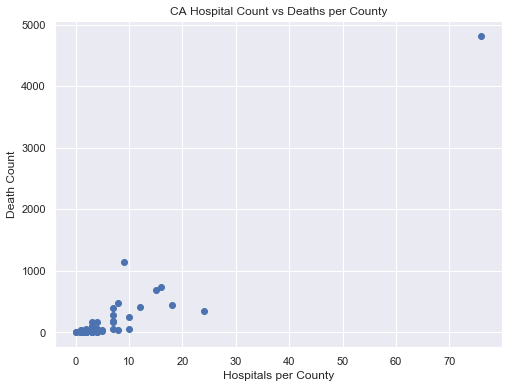

In [124]:
plt.figure(figsize=(8, 6))
plt.title('CA Hospital Count vs Deaths per County')
plt.ylabel('Death Count')
plt.xlabel('Hospitals per County')
plt.scatter(hospital_death_CA['#Hospitals'], hospital_death_CA['Deaths'])

In [125]:
smokers_county = data[data['StateName'] == 'CA'][['CountyName','Smokers_Percentage']]
smokers_county = smokers_county.reset_index(drop=True)
smokers_county

,CountyName,Smokers_Percentage
0,Alameda,9.732710
1,Alpine,14.455124
2,Amador,10.832190
3,Butte,13.768327
4,Calaveras,10.951936
5,Colusa,12.217256
6,Contra Costa,9.940587
7,Del Norte,15.132245
8,El Dorado,11.220361
9,Fresno,13.358908


In [126]:
cases_per_county = pd.DataFrame(case_data[case_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1).sum(axis = 1))
cases_per_county['County_Name'] = case_data[case_data['Province_State'] == 'California'][['Admin2']]
cases_per_county = cases_per_county.rename(columns = {0: 'Cases'})
cases_per_county = cases_per_county.reset_index(drop = True)
cases_per_county= cases_per_county.drop([58, 59])
cases_per_county

,Cases,County_Name
0,15259,Alameda
1,26,Alpine
2,105,Amador
3,274,Butte
4,169,Calaveras
5,48,Colusa
6,10301,Contra Costa
7,31,Del Norte
8,572,El Dorado
9,3381,Fresno


In [127]:
smoker_vs_case = smokers_county.join(cases_per_county, lsuffix='CountyName', rsuffix='County_Name')
smoker_vs_case = smoker_vs_case.drop(['CountyName'], axis = 1)
smoker_vs_case

,Smokers_Percentage,Cases,County_Name
0,9.732710,15259,Alameda
1,14.455124,26,Alpine
2,10.832190,105,Amador
3,13.768327,274,Butte
4,10.951936,169,Calaveras
5,12.217256,48,Colusa
6,9.940587,10301,Contra Costa
7,15.132245,31,Del Norte
8,11.220361,572,El Dorado
9,13.358908,3381,Fresno


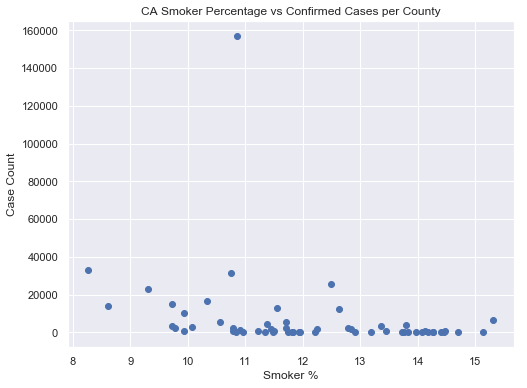

In [129]:
plt.figure(figsize=(8, 6))
plt.title('CA Smoker Percentage vs Confirmed Cases per County')
plt.ylabel('Case Count')
plt.xlabel('Smoker %')

plt.scatter(smoker_vs_case['Smokers_Percentage'],smoker_vs_case['Cases'])

In [131]:
#pulling US data from april dataset
US_data = april_data[april_data['Country_Region']== 'US'][:-1]
US_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,2020-04-18 22:32:47,36.1162,-119.6816,30491,1140,NaN,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,2020-04-18 22:32:47,39.0598,-105.3111,9047,389,NaN,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,2020-04-18 22:32:47,41.5978,-72.7554,17550,1086,NaN,16464.0,9.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2020-04-18 22:32:47,39.3185,-75.5071,2538,67,423.0,2471.0,10.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


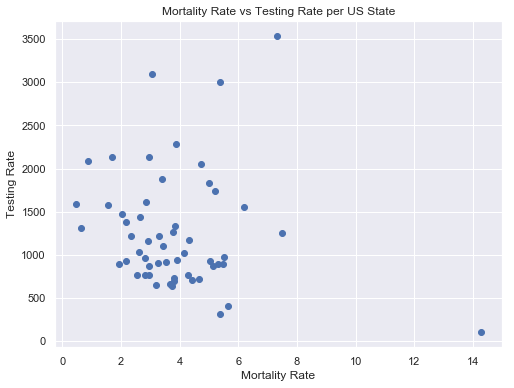

In [138]:

plt.figure(figsize=(8, 6))
plt.title('Mortality Rate vs Testing Rate per US State')
plt.ylabel('Testing Rate')
plt.xlabel('Mortality Rate')

plt.scatter(US_data['Mortality_Rate'], US_data['Testing_Rate'])

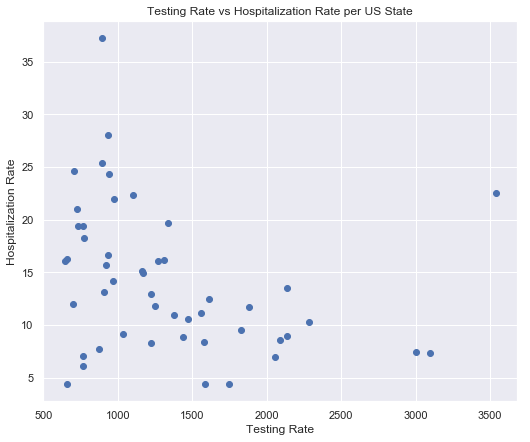

In [144]:
plt.figure(figsize=(8.5, 7))
plt.title('Testing Rate vs Hospitalization Rate per US State')
plt.xlabel('Testing Rate')
plt.ylabel('Hospitalization Rate')


plt.scatter(US_data['Testing_Rate'], US_data['Hospitalization_Rate'])

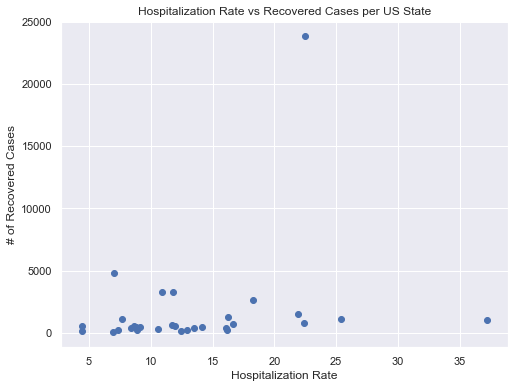

In [145]:
plt.figure(figsize=(8, 6))
plt.title('Hospitalization Rate vs Recovered Cases per US State')
plt.ylabel('# of Recovered Cases')
plt.xlabel('Hospitalization Rate')

plt.scatter(US_data['Hospitalization_Rate'], US_data['Recovered'])

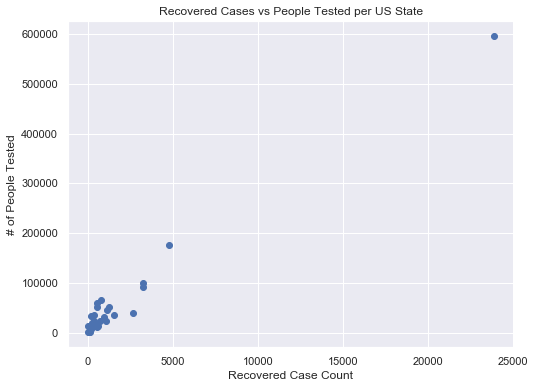

In [146]:
plt.figure(figsize=(8, 6))
plt.title('Recovered Cases vs People Tested per US State')
plt.ylabel('# of People Tested')
plt.xlabel('Recovered Case Count')

plt.scatter(US_data['Recovered'], US_data['People_Tested'])

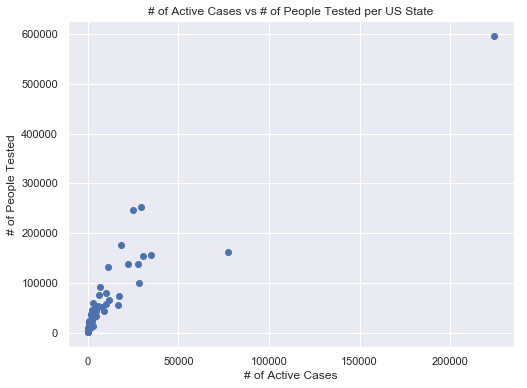

In [148]:
plt.figure(figsize=(8, 6))
plt.title('# of Active Cases vs # of People Tested per US State')
plt.ylabel('# of People Tested')
plt.xlabel('# of Active Cases')

plt.scatter(US_data['Active'], US_data['People_Tested'])